First, I'll import the modules I need to carry out data analysis.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
data = pd.read_csv('campus_crime.csv')
# Displaying the data for an initial check-in
data

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson
0,American River College,95250,0,0,1,2,3,2,6,8,0
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11
2,Ashford University,74596,0,0,2,0,0,0,1,0,0
3,Auburn University,25469,0,0,1,0,2,0,22,3,0
4,Austin Community College District,1082400,0,0,0,0,0,1,2,0,0
5,Ball State University,44294,0,0,8,0,1,0,31,0,0
6,Boston University,64878,0,0,6,0,2,3,60,2,0
7,Brigham Young University-Provo,170505,0,0,0,0,0,1,10,3,4
8,Broward College,379782,0,0,0,0,3,2,6,10,0
9,California State Polytechnic University-Pomona,21107,0,0,7,0,2,0,23,15,0


In [13]:
# Summing reported crimes to be able to do some arithmetic

data["total_count"] = data["murder"] + data["manslaughter"] + data["forcible"]\
  + data["nonforce"] + data["robbery"] + data["agg_aslt"] + data["burglary"]\
  + data['vehicle'] + data["arson"]

I noticed that burglary was the most common crime and in skimming saw that it didn't directly correlate to enrollment. I figured I'd treat this as my first story lead.

In [17]:
data.sort_values('burglary', ascending=False)

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson
209,University of Toledo,67830,0,0,2,0,1,4,118,0,4
169,University of California-Los Angeles,39271,0,0,8,0,2,4,118,7,0
206,University of South Carolina-Columbia,30721,0,0,1,0,2,8,113,22,0
116,Pennsylvania State University-Main Campus,45628,0,0,24,0,2,6,112,1,11
142,Stony Brook University,23920,0,0,13,0,2,2,96,7,2
210,University of Utah,31660,0,0,5,0,0,3,90,0,0
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11
69,Indiana University-Bloomington,42731,0,0,11,0,3,12,89,18,3
167,University of California-Davis,63464,0,0,24,0,5,4,86,13,1
91,Michigan State University,191300,0,0,15,0,1,10,77,9,0


In [28]:
# To figure out burglaries per 1000 students:
data["enr_1000"] = data["total_enr"] / 1000
data["burglary_1000"] = data["burglary"] / data["enr_1000"]
burgs = data.sort_values("burglary_1000", ascending=False)
burgs

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,burglary_per_student,enr_1000,burglary_1000
142,Stony Brook University,23920,0,0,13,0,2,2,96,7,2,0.004013,23.920,4.013378
206,University of South Carolina-Columbia,30721,0,0,1,0,2,8,113,22,0,0.003678,30.721,3.678266
169,University of California-Los Angeles,39271,0,0,8,0,2,4,118,7,0,0.003005,39.271,3.004762
210,University of Utah,31660,0,0,5,0,0,3,90,0,0,0.002843,31.660,2.842704
89,Metropolitan State College of Denver,23789,0,0,1,0,0,2,66,7,0,0.002774,23.789,2.774392
200,University of North Carolina at Charlotte,25277,0,0,2,0,6,1,65,9,0,0.002572,25.277,2.571508
162,University at Buffalo,28849,0,0,3,0,3,4,73,6,1,0.002530,28.849,2.530417
116,Pennsylvania State University-Main Campus,45628,0,0,24,0,2,6,112,1,11,0.002455,45.628,2.454633
69,Indiana University-Bloomington,42731,0,0,11,0,3,12,89,18,3,0.002083,42.731,2.082797
165,University of Arkansas,23199,0,0,5,0,1,2,46,16,0,0.001983,23.199,1.982844


Something I've noticed rather quickly is that the schools with the highest burglary rates are at small-medium universities. The first 11 schools all have under 50,000 students and range from over 4 to around 1.85 burglaries per 1000 students. 24 schools have 0 reported burglaries. Some of these are for-profit colleges with primarily online enrollment, but not all of them. The Community College of Baltimore County, for example, offers some online degrees but has many physical locations for students to attend classes at. So why do these middle-sized universities have such high burglary rates (especially Stony Brook, which has a significantly higher rate of burglary than even the second-most burgled campus)? Why do some of these universities have no reported burglaries, particularly the ones that offer a lot of in-person opportunities?

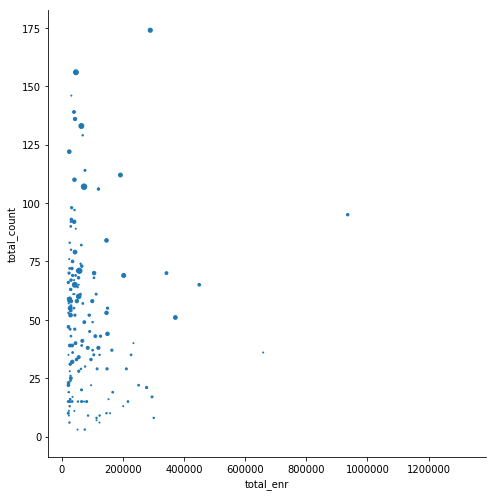

In [33]:
# I wanted to look at total counts of reports vs. counts of forcible assaults (I am assuming that is what field "forcible" stands for)
data["total_count"] = data["murder"] + data["manslaughter"] + data["forcible"]\
  + data["nonforce"] + data["robbery"] + data["agg_aslt"] + data["burglary"]\
  + data['vehicle'] + data["arson"]
plot = sns.FacetGrid(data, height=7)
plot.map(plt.scatter, "total_enr", "total_count", "forcible")

So that visualization is basically useless. I figured I'd do some math and look at the schools in the top 25% of enrollment. Then, I'd change it so that the "forcible" figure would change the hue, not the size, of the point.

In [35]:
data["total_enr"].describe()

count    2.280000e+02
mean     1.082848e+05
std      1.537517e+05
min      2.016000e+04
25%      2.949325e+04
50%      5.477800e+04
75%      1.227450e+05
max      1.323315e+06
Name: total_enr, dtype: float64

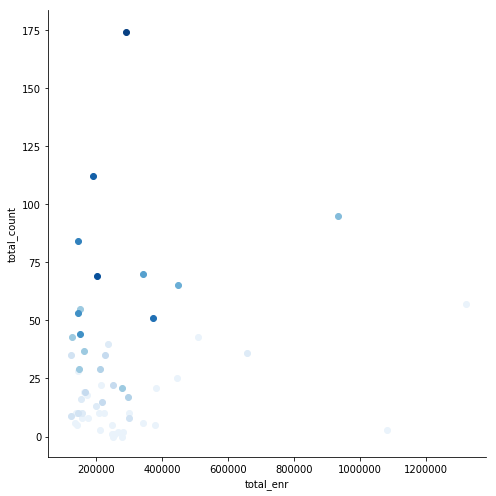

In [42]:
forcible_data = data[data.total_enr > 1.227450e+05]
# Now, I'll plot it.
forcible_plot = sns.FacetGrid(forcible_data, height=7, hue="forcible", palette="Blues")
forcible_plot.map(plt.scatter, "total_enr", "total_count")

Some of the highest forcible assault figures occur at universities/university systems with high enrollment but middle-of-the-road figures for total crime reports. What are those universities?

In [46]:
force = forcible_data.sort_values("forcible", ascending=False)
force

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,burglary_per_student,enr_1000,burglary_1000,total_count
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11,0.000311,289.016,0.311401,174
56,George Washington University,202080,0,0,16,0,1,4,45,2,1,0.000223,202.080,0.222684,69
91,Michigan State University,191300,0,0,15,0,1,10,77,9,0,0.000403,191.300,0.402509,112
219,Virginia Polytechnic Institute and State Unive...,371232,1,0,14,0,0,3,30,3,0,0.000081,371.232,0.080812,51
211,University of Virginia-Main Campus,145782,0,0,13,0,1,0,54,16,0,0.000370,145.782,0.370416,84
204,University of Pennsylvania,148992,0,0,12,0,9,2,19,1,1,0.000128,148.992,0.127524,44
144,Syracuse University,145803,0,0,12,0,0,4,36,0,1,0.000247,145.803,0.246908,53
208,University of Southern California,342090,0,0,8,0,5,1,50,4,2,0.000146,342.090,0.146160,70
120,Purdue University-Main Campus,449339,0,0,7,0,1,2,49,4,2,0.000109,449.339,0.109049,65
173,University of Central Florida,935440,0,0,6,0,10,12,32,35,0,0.000034,935.440,0.034209,95


I'm guessing as to what the data points are—not sure how to pull out a specific data point from a visualization, but while the hue of the dots in the above plot generally correlate with the number of crimes reported, they don't really correlate with campus enrollment figures. Take, for example, GW—its enrollment is just above 200,000, but has the second highest number of forcible assaults reported in the top enrollment quartile. What is GW doing differently (or how is it different otherwise) that results in such a high rate of reported forcible assaults in comparison to its peers?

Something else I noticed: ASU, for its size, has a disproportionately high rate of crime reports generally. Why is that? It seems strange. Could be misreported, but if it's true that ASU, within the top quartile of campus populations, is more than 60 reports higher than the next university, that's a pretty big outlier.

## Conclusions
In review, here are the 3 stories I've pulled out from the dataset using Seaborn and Pandas.
1. Why do middle-sized universities have such high burglary rates (especially Stony Brook, which has a significantly higher rate of burglary than even the second-most burgled campus)? Why do some of these universities have no reported burglaries, particularly the ones that offer a lot of in-person opportunities?
2. What is GW doing differently (or how is it different otherwise) that results in such a high rate of reported forcible assaults in comparison to its peers?
3. Why does ASU have such a high rate of crime reports generally? It's a pretty extreme outlier among large universities.